# Ensemble Techniques on Parkinson's Disease

## Context

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration
    of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds),
    hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is
    increased.
	Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations.
    Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe.
    Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
 	require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for 
	diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step 
	prior to an appointment with a clinician

## Objective

Goal is to classify the patients into the respective labels using the attributes from
their voice recordings

## Attribute Information

    1. name - ASCII subject name and recording number
	2. MDVP:Fo(Hz) - Average vocal fundamental frequency
	3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
	4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
	5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
	6. measures of variation in fundamental frequency
	7. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S
	8. himmer:DDA - Several measures of variation in amplitude
	9. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
	10. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
	11. RPDE,D2 - Two nonlinear dynamical complexity measures
	12. DFA - Signal fractal scaling exponent
	13. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency
	14. variation 
    15. car name: string (unique for each instance)

### Importing necessary Libraries

In [138]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [139]:
df = pd.read_csv("Data - Parkinsons")

### It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.


In [140]:
#viewing dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


By looking at the attributes/columns we undestand **status as Target/Dependent variable** and **all** other columns are **Independent variables.**.

In [141]:
#checking dimension
df.shape

(195, 24)

In [142]:
#Checking datatype
pd.DataFrame(df.dtypes, columns =['Datatype'])

,Datatype
name,object
MDVP:Fo(Hz),float64
MDVP:Fhi(Hz),float64
MDVP:Flo(Hz),float64
MDVP:Jitter(%),float64
MDVP:Jitter(Abs),float64
MDVP:RAP,float64
MDVP:PPQ,float64
Jitter:DDP,float64
MDVP:Shimmer,float64


In [143]:
#checking attributes
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [144]:
#checking NULL values
pd.DataFrame(df.isnull().sum(), columns = ['No. of Missing vlaues'])

,No. of Missing vlaues
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


There are no NULL values.

In [145]:
#Statistical Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [146]:
#checking no. of different values
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [147]:
#complete overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

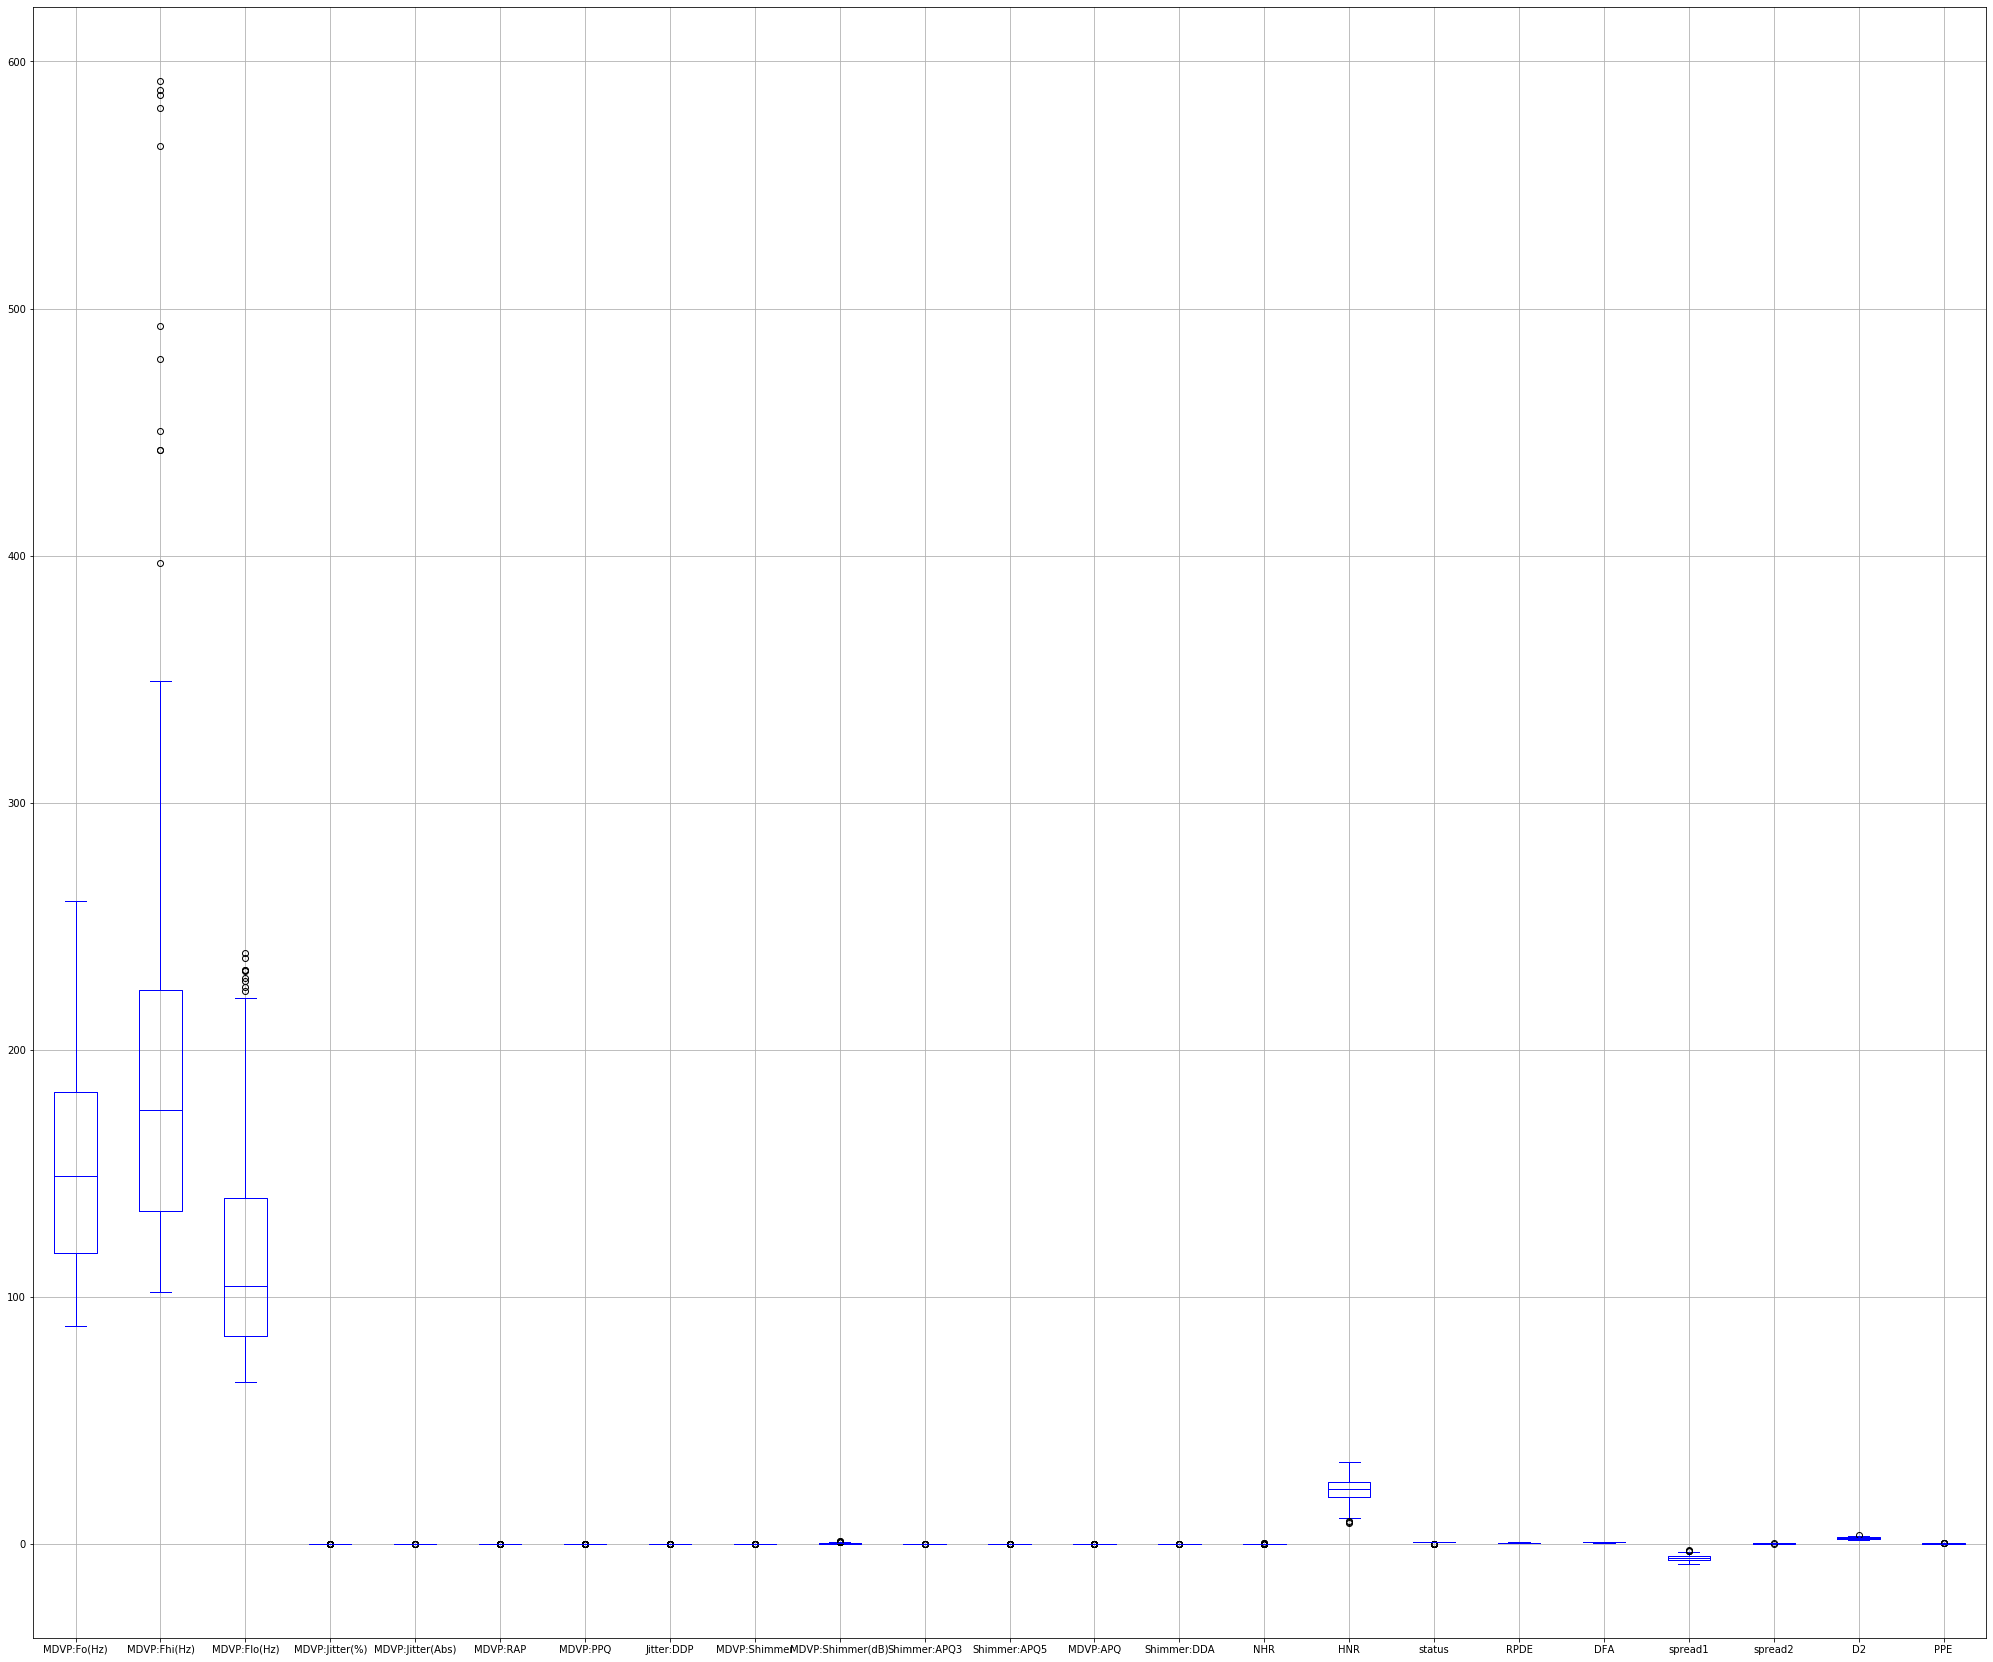

In [148]:
#checking for outliers
df.boxplot(figsize=(35,30), color='blue');

There are outliers in many columns.

### Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc.

##### UNIVARIATE ANALYSIS

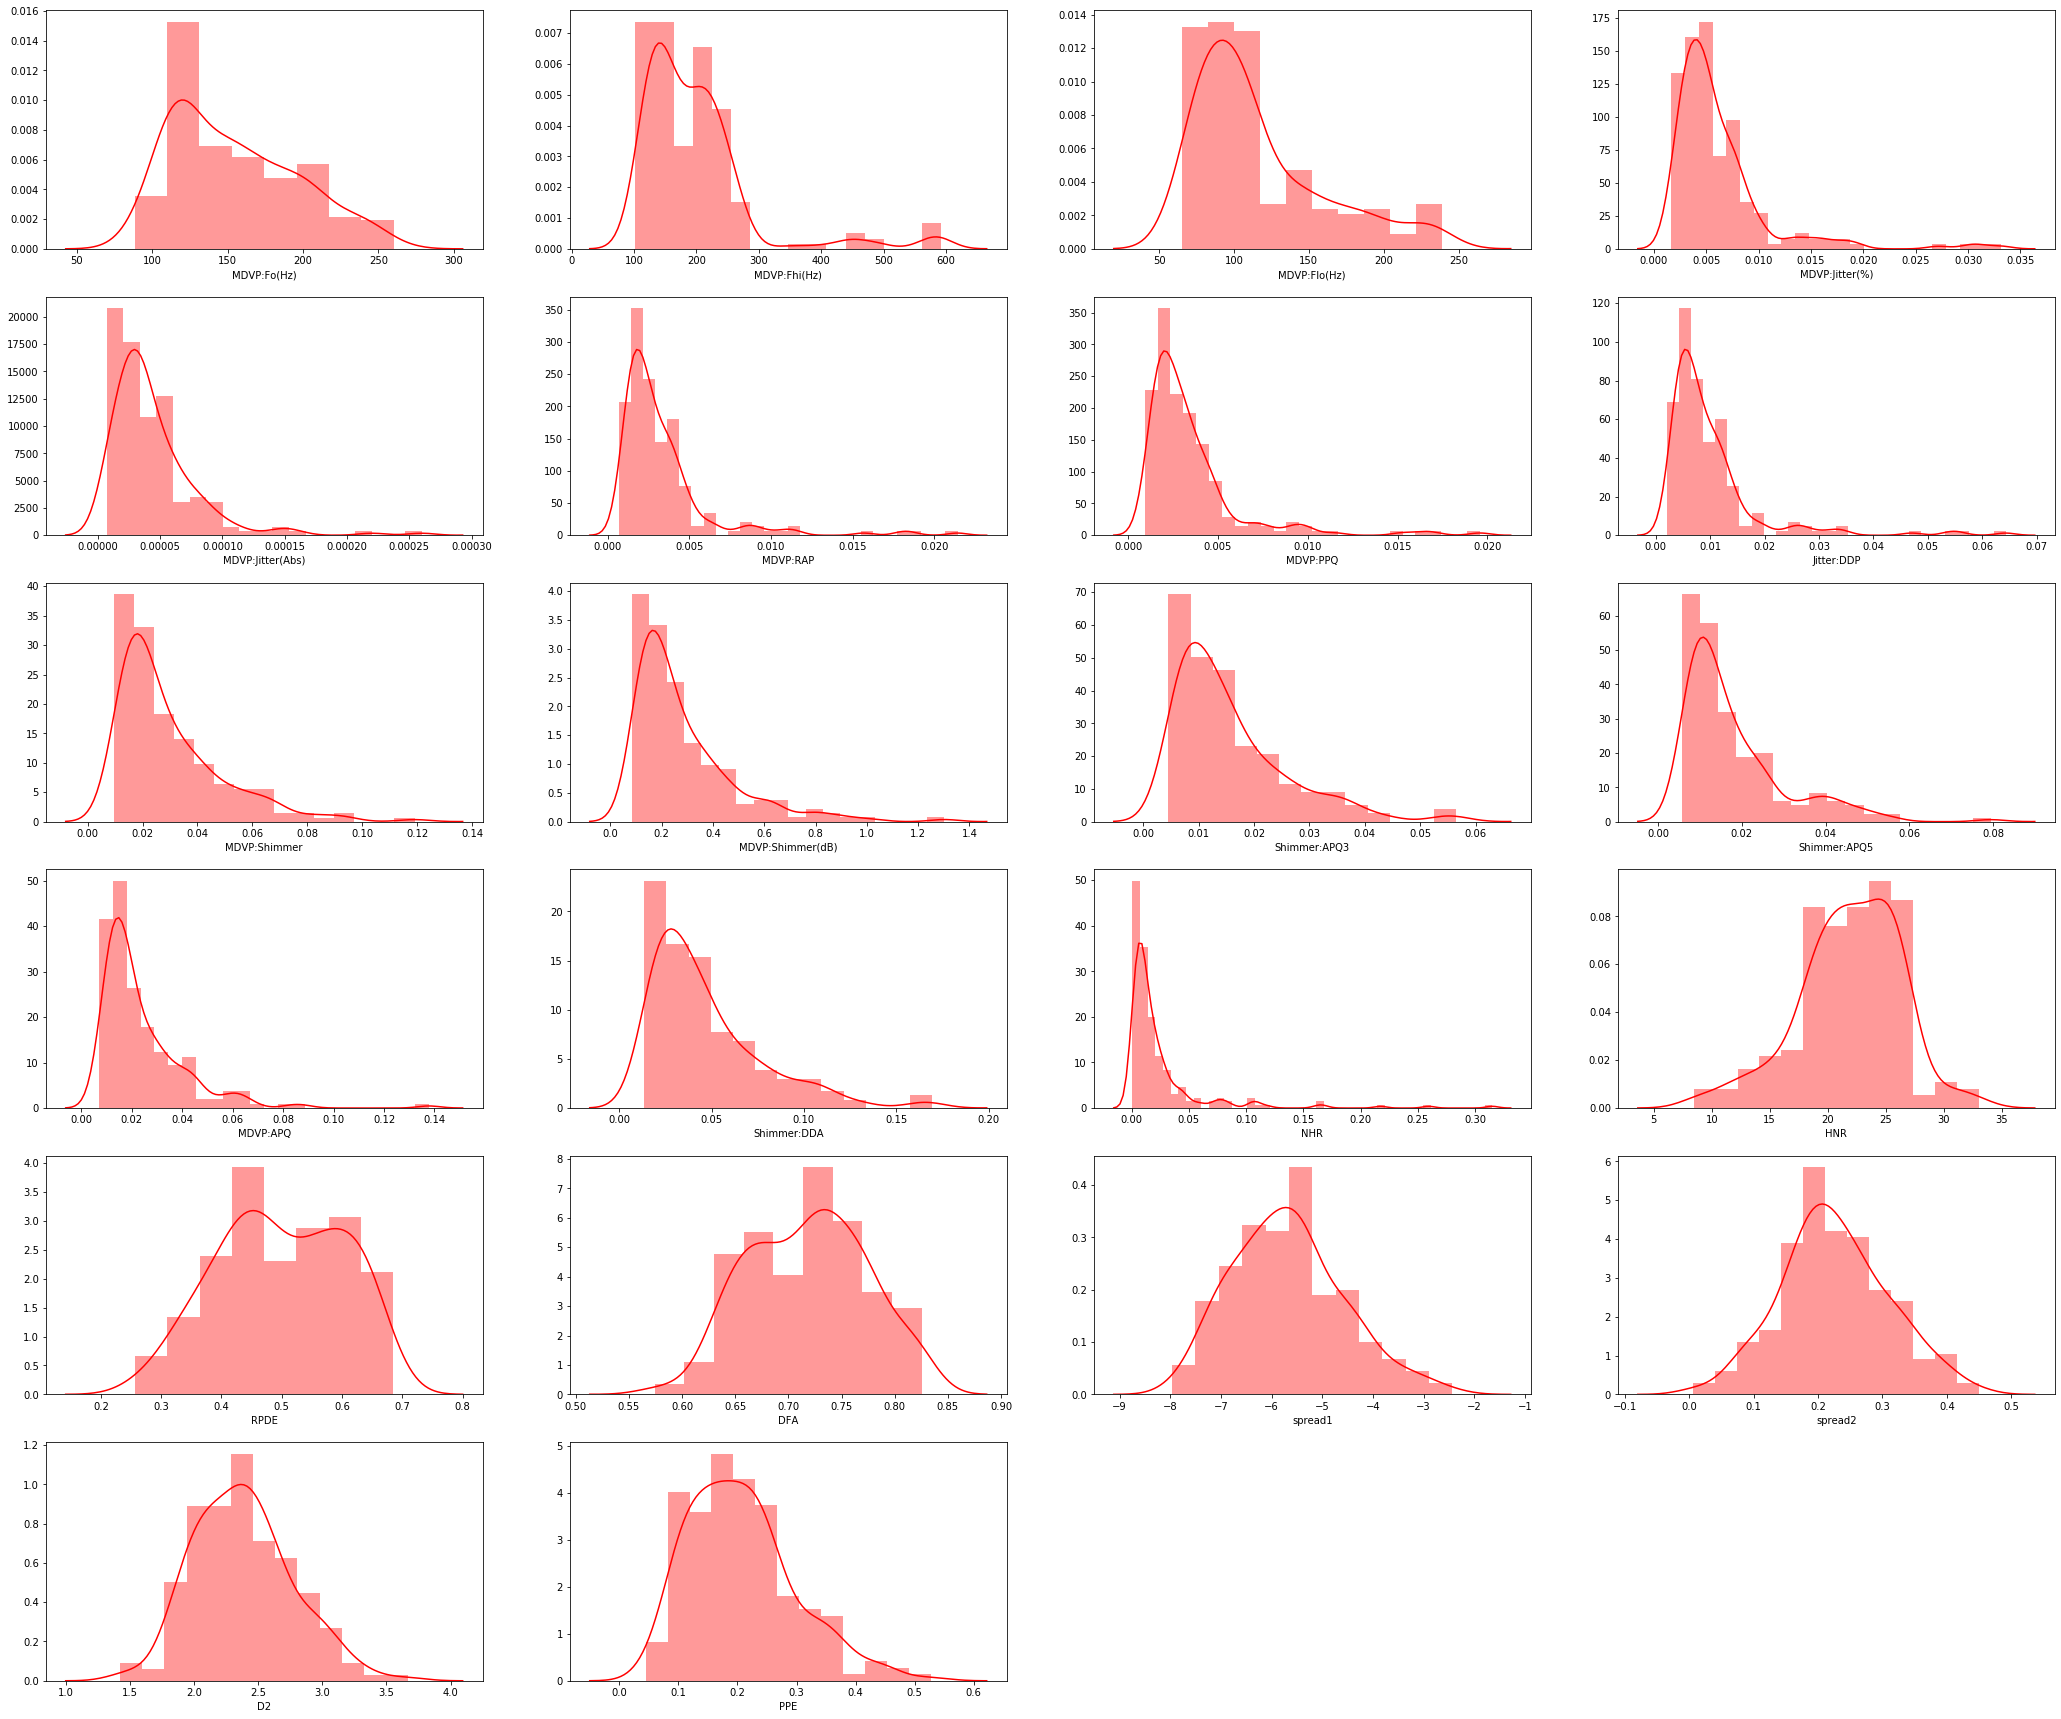

In [149]:
Cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
pos = 1

plt.figure(figsize=(36,36))
for i in Cols:
    plt.subplot(7,4,pos)
    sns.distplot(df[i],color='red')
    pos+=1

1    147
0     48
Name: status, dtype: int64

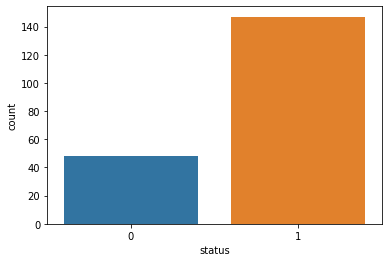

In [150]:
#status (0 or 1) :- Health status of the subject (one) - Parkinson's, (zero) - healthy
sns.countplot(df['status'])
df['status'].value_counts()

We can see 48 people are healthy and 147 suffered from Parkinson's disease

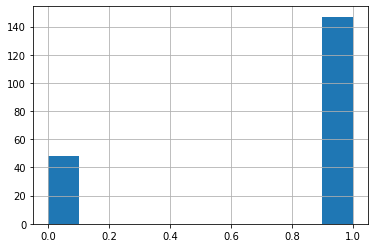

In [151]:
#checking Normality of Target variable
s = df['status']
s.hist();

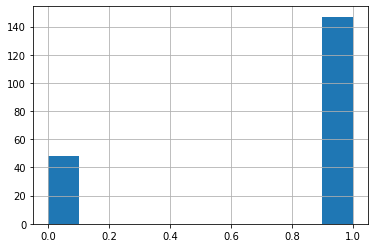

In [152]:
s_log = np.sqrt(s)
s.hist();

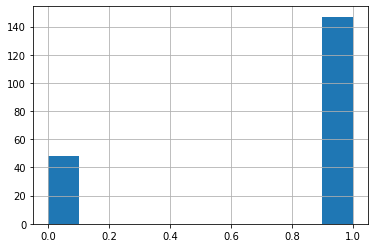

In [153]:
s_log = np.exp(s)
s.hist();

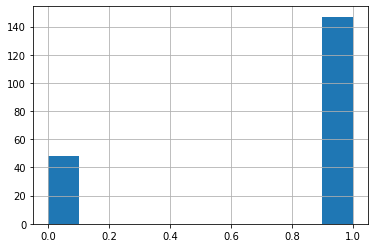

In [154]:
s_log = np.square(s)
s.hist();

##### After log,exp,sqrt and square transformation also, target variable is not following Normal distribution

##### MULTIVARIATE Analysis

In [155]:
#checking correlation between variables
corr = df.corr()
plt.figure(figsize=(25,20))
corr.style.background_gradient(cmap='magma')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<Figure size 1800x1440 with 0 Axes>

We can see that there is high correlation between lot of varibles.  We need to treat it. We can tranform the data and check VIF and drop variables.

In [156]:
# Lets find out the correlation of the attributes in terms of only the target column
cor = df.corr()['status']
cor.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

This gives us a clear picture of the attributes that contribute towards the analysis of our target variable and by this we get an idea of what our important feature variables are and which of those could be removed so that we get better accuracy as these are not of much importance while calculating the target variable; eg: We could take a threshold of say 2.7/2.8 and all the columns below that threshold could be eliminated so that we get better results with our model

### Splitting the dataset into training and test set in the ratio of 70:30 (Training:Test) 


In [157]:
from sklearn.model_selection import train_test_split

#Independent Variables, here dropping name column as it is not meaningful for analysis
X= df.drop(['status','name','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','NHR'], axis = 1)

#Dependent variable 
y = df['status']

#Spliting Train and Test data in the ratio of 70:30
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 1 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136, 18), (59, 18), (136,), (59,))

### Preparing data for training (Scaling)

In [158]:
#Standardizing the data
from scipy.stats import zscore

#apply zscore on independent features
Xtrain_std = X_train.apply(zscore)
Xtest_std = X_test.apply(zscore)

### Training some at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

In [159]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fit the model using the train data

    pred_train = model.predict(X_train)   # model predictions on the train data
    pred_test = model.predict(X_test)     # model predictions on the test data

    score = round(model.score(X_test, y_test), 3)   # accuracy on the test data


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred_test).ravel()  # confusion matrix for y_test and pred_test

    recall = round(tp/(tp+fn), 3)     # calculate recall
    precision = round(tp/(tp+fp), 3)  # calculate precision
    specificity =round(tn/(tn+fp),3)  # calculate specificity
    f1_score =  round(2*precision*recall/(precision + recall), 3)   # calculate f1 score
    
    
    return score, recall, precision, specificity, f1_score, pred_train, pred_test  # return all the metrics

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

lr = LogisticRegression(solver = 'liblinear')        # Create a Logistic Regression model object 
knn = KNeighborsClassifier()                         # Create a KNN model object 
nb = GaussianNB()                                    # Create a Naive Bayes' model object 
svm = SVC(gamma = 'auto', kernel= 'poly', degree=1)  # Create an SVM model object 

result = {}   # Create an empty dictionary to later use to store metrics of each of the models


# putting all 4 models in a for loop and appending the results of each of the models to the result dictionary
for model, name  in list(zip([lr, knn, nb, svm], ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'])):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)
    
result1 = pd.DataFrame(np.array(list(result.values()))[:,0:5],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Accuracy','Recall','Precision','Specificity','F1 Score'], # name the columns appropriatly
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Logistic Regression,0.814,0.95,0.809,0.526,0.874
KNN,0.797,0.95,0.792,0.474,0.864
Naive Bayes,0.746,0.65,0.963,0.947,0.776
SVM,0.797,0.975,0.78,0.421,0.867


### 7. Train a meta-classifier and note the accuracy on test data (10 points)


In [161]:
from sklearn.naive_bayes import BernoulliNB
meta = BernoulliNB()                          # Create a Naive Bayes classifier object to be used as a meta classifier

# use fit_n_print and assign the metrics to result1
result1.loc['Meta Classifier(NB)'] = fit_n_print(meta, X_train, X_test, y_train, y_test)[0:5]
result1

,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Logistic Regression,0.814,0.95,0.809,0.526,0.874
KNN,0.797,0.95,0.792,0.474,0.864
Naive Bayes,0.746,0.65,0.963,0.947,0.776
SVM,0.797,0.975,0.78,0.421,0.867
Meta Classifier(NB),0.678,1,0.678,0,0.808


### 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy.

#### Decision Tree Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier

meta_dt = DecisionTreeClassifier(random_state= 1)

result1.loc['Meta Classifier(DT)'] = fit_n_print(meta_dt, X_train, X_test, y_train, y_test)[0:5]
result1

,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Logistic Regression,0.814,0.95,0.809,0.526,0.874
KNN,0.797,0.95,0.792,0.474,0.864
Naive Bayes,0.746,0.65,0.963,0.947,0.776
SVM,0.797,0.975,0.78,0.421,0.867
Meta Classifier(NB),0.678,1,0.678,0,0.808
Meta Classifier(DT),0.881,0.925,0.902,0.789,0.913


#### Randome Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1, n_estimators=10)  # specifying the n_estimators to silence a future warning

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = fit_n_print(rf, X_train, X_test, y_train, y_test)[0:5]
result1.loc['Random Forest'] = rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score
result1

,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Logistic Regression,0.814,0.95,0.809,0.526,0.874
KNN,0.797,0.95,0.792,0.474,0.864
Naive Bayes,0.746,0.65,0.963,0.947,0.776
SVM,0.797,0.975,0.78,0.421,0.867
Meta Classifier(NB),0.678,1,0.678,0,0.808
Meta Classifier(DT),0.881,0.925,0.902,0.789,0.913
Random Forest,0.847,0.975,0.83,0.579,0.897


#### Bagging Classifier

In [165]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(random_state=1, n_estimators=10)  # specifying the n_estimators to silence a future warning

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = fit_n_print(rf, X_train, X_test, y_train, y_test)[0:5]
result1.loc['Bagging Classifier'] = rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score
result1


,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Logistic Regression,0.814,0.95,0.809,0.526,0.874
KNN,0.797,0.95,0.792,0.474,0.864
Naive Bayes,0.746,0.65,0.963,0.947,0.776
SVM,0.797,0.975,0.78,0.421,0.867
Meta Classifier(NB),0.678,1,0.678,0,0.808
Meta Classifier(DT),0.881,0.925,0.902,0.789,0.913
Random Forest,0.847,0.975,0.83,0.579,0.897
Bagging Classifier,0.847,0.975,0.83,0.579,0.897


#### Ada Boost Classifier

In [166]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(random_state=1, n_estimators=10)  # specifying the n_estimators to silence a future warning

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = fit_n_print(rf, X_train, X_test, y_train, y_test)[0:5]
result1.loc['Adaboost Classifier'] = rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score
result1


,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Logistic Regression,0.814,0.95,0.809,0.526,0.874
KNN,0.797,0.95,0.792,0.474,0.864
Naive Bayes,0.746,0.65,0.963,0.947,0.776
SVM,0.797,0.975,0.78,0.421,0.867
Meta Classifier(NB),0.678,1,0.678,0,0.808
Meta Classifier(DT),0.881,0.925,0.902,0.789,0.913
Random Forest,0.847,0.975,0.83,0.579,0.897
Bagging Classifier,0.847,0.975,0.83,0.579,0.897
Adaboost Classifier,0.847,0.975,0.83,0.579,0.897


#### Gradient Boosting Classifier

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(random_state=1, n_estimators=10)  # specifying the n_estimators to silence a future warning

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = fit_n_print(rf, X_train, X_test, y_train, y_test)[0:5]
result1.loc['GradientBoost Classifier'] = rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score
result1


,Accuracy,Recall,Precision,Specificity,F1 Score
Model,,,,,
Logistic Regression,0.814,0.95,0.809,0.526,0.874
KNN,0.797,0.95,0.792,0.474,0.864
Naive Bayes,0.746,0.65,0.963,0.947,0.776
SVM,0.797,0.975,0.78,0.421,0.867
Meta Classifier(NB),0.678,1,0.678,0,0.808
Meta Classifier(DT),0.881,0.925,0.902,0.789,0.913
Random Forest,0.847,0.975,0.83,0.579,0.897
Bagging Classifier,0.847,0.975,0.83,0.579,0.897
Adaboost Classifier,0.847,0.975,0.83,0.579,0.897


- With minimal preprocessing, we got the above results

- For additional preprocesing steps, we can eliminate few attributes using VIF to get rid of multicollinearity, we can treat outliers, a more of an advanced methods will be to use PCA which will reduce dimensions and also get rid of multicollinearity

- But for now, we will carry on with the processed data that we have


### 9. Compare all the models (minimum 5) and pick the best one among them.

- Of all the models Decision Tree and Random Forest stood out and gave the best metrics.
- Between the two, I would pick Random Forest as my final model because it has better numbers overall
- We have seen how to use Ensemble models in this project

So, we can chooes Random Forest as best classifier for figuring out Parkinson disease as it is very critical problem.
